In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
wallmart = pd.read_excel(r'D:\Downloads\DATA\New folder\New folder\excel wallmart.xlsx')
wallmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Average,Average2
0,6,47,2010-02-05,-59.00,False,Feb,2010,NaN,NaN
1,26,54,2010-02-05,-34.00,False,Feb,2010,NaN,NaN
2,9,49,2010-02-05,-15.00,False,Feb,2010,NaN,NaN
3,30,32,2010-02-05,-12.99,False,Feb,2010,NaN,NaN
4,31,78,2010-02-05,-12.00,False,Feb,2010,NaN,NaN


In [24]:
wallmart.drop (columns=['Average','Average2'], inplace=True)

In [25]:
wallmart.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Month           0
Year            0
dtype: int64

In [26]:
wallmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year
0,6,47,2010-02-05,-59.00,False,Feb,2010
1,26,54,2010-02-05,-34.00,False,Feb,2010
2,9,49,2010-02-05,-15.00,False,Feb,2010
3,30,32,2010-02-05,-12.99,False,Feb,2010
4,31,78,2010-02-05,-12.00,False,Feb,2010


In [27]:
# Convert Date to datetime
wallmart['Date'] = pd.to_datetime(wallmart['Date'])

# Aggregate by Month-Year
monthly_sales = wallmart.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum().reset_index() 

print(monthly_sales.head())


        Date  Weekly_Sales
0 2010-02-28  1.903330e+08
1 2010-03-31  1.819198e+08
2 2010-04-30  2.314124e+08
3 2010-05-31  1.867109e+08
4 2010-06-30  1.922462e+08


C:\Users\Collins S enior\AppData\Local\Temp\ipykernel_8588\1150112881.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = wallmart.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum().reset_index()


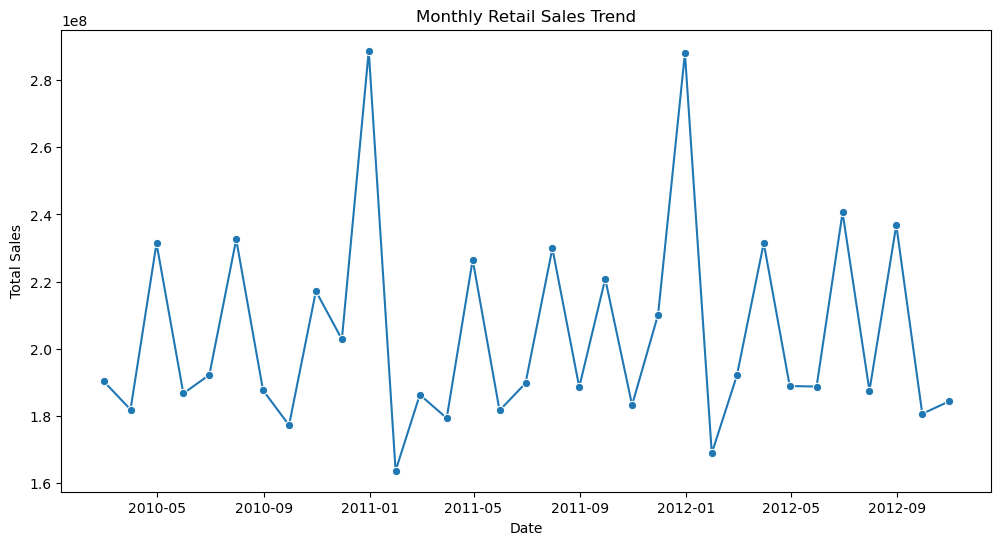

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Date", y="Weekly_Sales", marker="o")
plt.title("Monthly Retail Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


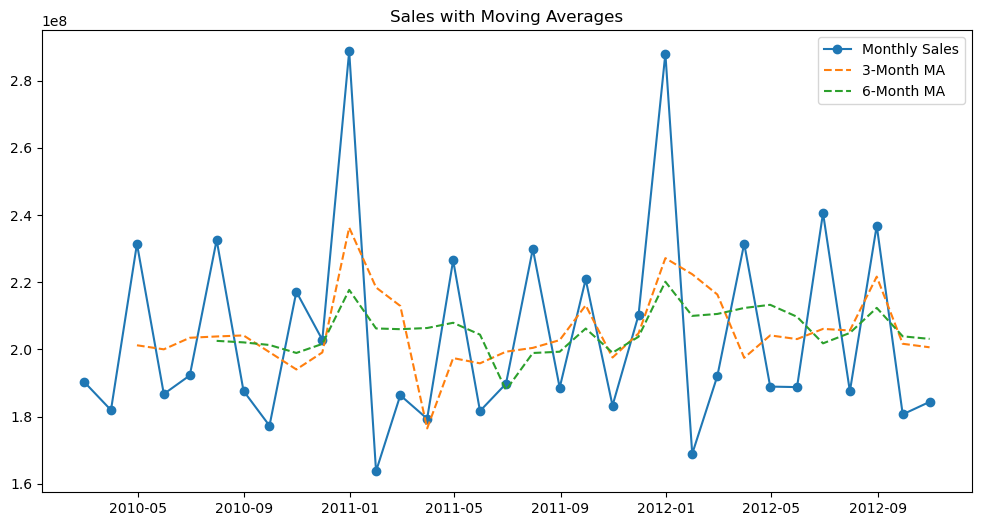

In [29]:
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()
monthly_sales['MA_6'] = monthly_sales['Weekly_Sales'].rolling(window=6).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label="Monthly Sales", marker="o")
plt.plot(monthly_sales['Date'], monthly_sales['MA_3'], label="3-Month MA", linestyle="--")
plt.plot(monthly_sales['Date'], monthly_sales['MA_6'], label="6-Month MA", linestyle="--")
plt.legend()
plt.title("Sales with Moving Averages")
plt.show()


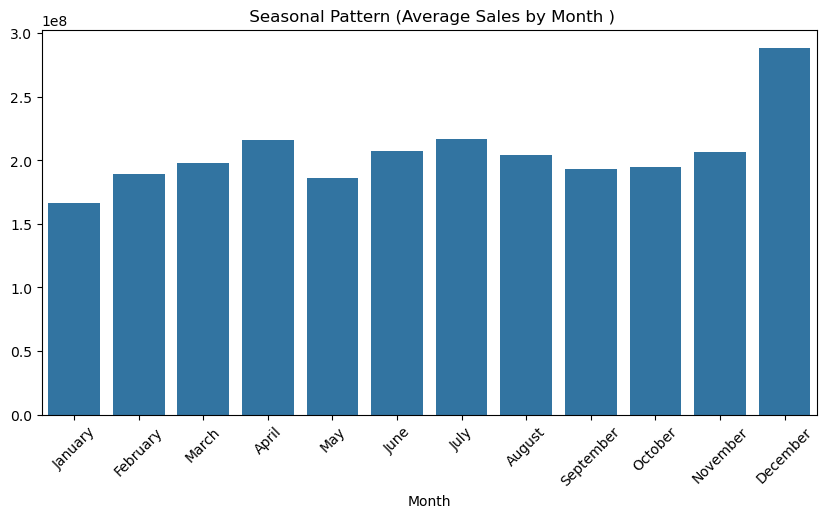

In [30]:
                    ###Seasonal Patterns (Monthly & Yearly)####

# Extract Year and Month
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['Month'] = monthly_sales['Date'].dt.month_name()

# Average sales by Month (seasonality)
seasonal = monthly_sales.groupby("Month")['Weekly_Sales'].mean().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

plt.figure(figsize=(10,5))
sns.barplot(x=seasonal.index, y=seasonal.values)
plt.title(" Seasonal Pattern (Average Sales by Month )")
plt.xticks(rotation=45)
plt.show()


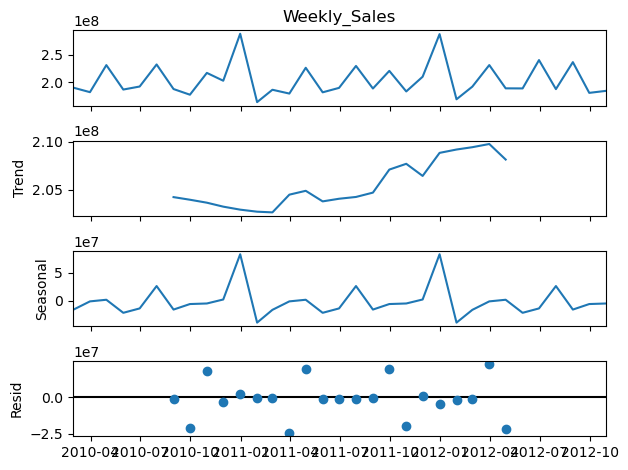

In [31]:
                        ####Time Series Decomposition (Trend, Seasonality, Residual)####

from statsmodels.tsa.seasonal import seasonal_decompose

monthly_sales.set_index('Date', inplace=True)

# Decompose
decomp = seasonal_decompose(monthly_sales['Weekly_Sales'], model='additive', period=12)

decomp.plot()
plt.show()


In [33]:
# Revenue by product (Dept) over time
dept_sales = wallmart.groupby([pd.Grouper(key='Date', freq='M'), 'Dept'])['Weekly_Sales'].sum().reset_index()

# Revenue by store/region over time
store_sales = wallmart.groupby([pd.Grouper(key='Date', freq='M'), 'Store'])['Weekly_Sales'].sum().reset_index()

print(dept_sales.head())
print(store_sales.head())


C:\Users\Collins S enior\AppData\Local\Temp\ipykernel_8588\50138425.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = wallmart.groupby([pd.Grouper(key='Date', freq='M'), 'Dept'])['Weekly_Sales'].sum().reset_index()


        Date  Dept  Weekly_Sales
0 2010-02-28     1    4138664.75
1 2010-02-28     2    7658267.17
2 2010-02-28     3    1739169.28
3 2010-02-28     4    4470499.52
4 2010-02-28     5    4231371.27
        Date  Store  Weekly_Sales
0 2010-02-28      1    6307344.10
1 2010-02-28      2    8264347.77
2 2010-02-28      3    1711198.23
3 2010-02-28      4    8299040.36
4 2010-02-28      5    1202728.00


C:\Users\Collins S enior\AppData\Local\Temp\ipykernel_8588\50138425.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = wallmart.groupby([pd.Grouper(key='Date', freq='M'), 'Store'])['Weekly_Sales'].sum().reset_index()


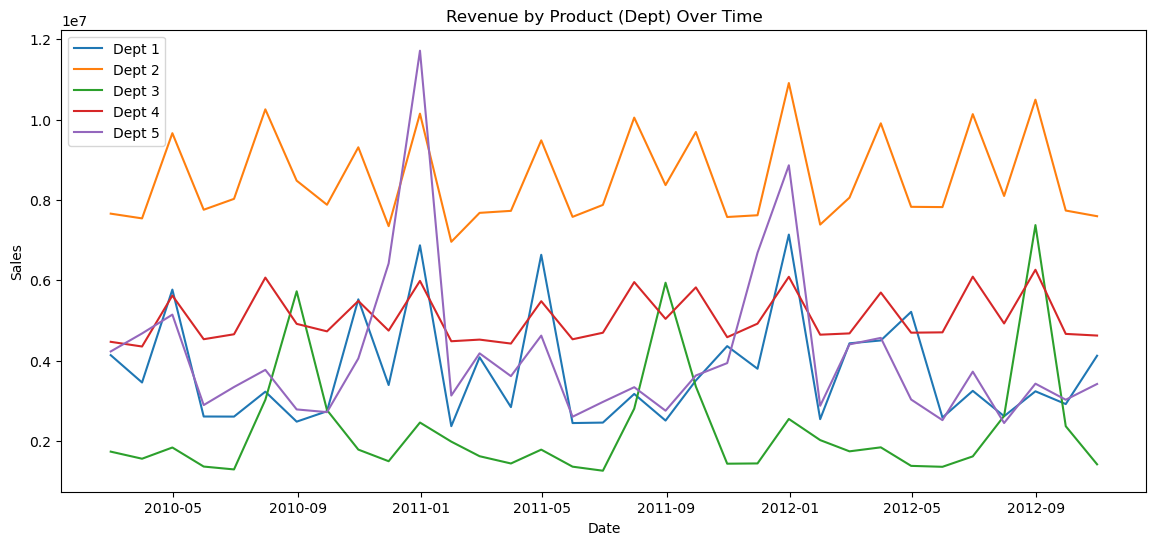

In [34]:
plt.figure(figsize=(14,6))
for dept in dept_sales['Dept'].unique()[:5]:  # limit to first 5 for clarity
    temp = dept_sales[dept_sales['Dept'] == dept]
    plt.plot(temp['Date'], temp['Weekly_Sales'], label=f"Dept {dept}")

plt.title("Revenue by Product (Dept) Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


d:\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Collins S enior\AppData\Local\Temp\ipykernel_8588\153104644.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales['Date'].iloc[-1], periods=12, freq="M"), future_forecast,


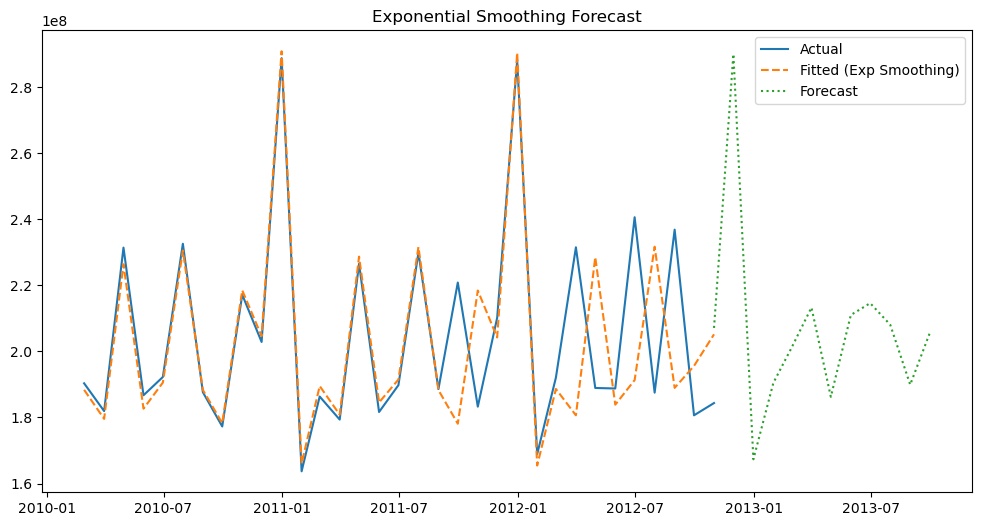

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit model
model = ExponentialSmoothing(monthly_sales['Weekly_Sales'], trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

# Forecast next 12 months
monthly_sales['Forecast'] = fit.fittedvalues
future_forecast = fit.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label="Actual")
plt.plot(monthly_sales['Date'], monthly_sales['Forecast'], label="Fitted (Exp Smoothing)", linestyle="--")
plt.plot(pd.date_range(monthly_sales['Date'].iloc[-1], periods=12, freq="M"), future_forecast, 
         label="Forecast", linestyle="dotted")
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()
